# Data Description and prediction
The data wine from sklearn is the results of a chemical analysis of wines grown in the same region in Italy. 
There are thirteen different measurements found in the three types of wine.
In this dataset, there are 178 instances and 13 attributes which are Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline.
I will use this data to find the relationship from different factors and make a prediction.



In [36]:
# import numpy as np
import pandas as pd
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import statsmodels.formula.api as smf

wine = sklearn.datasets.load_wine()
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None
From this graph, we can see that more alcohol, deeper color intensity is.


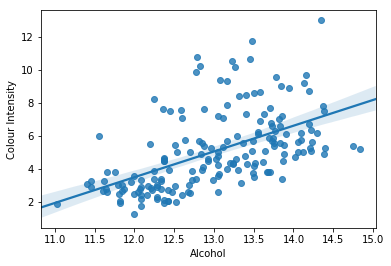

In [42]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df  = pd.read_csv(URL,header=None)
print(df.info())
df
sns.regplot(x=df[1], y=df[10], data=wine)
plt.xlabel('Alcohol')
plt.ylabel('Colour Intensity')
print('From this graph, we can see that more alcohol, deeper color intensity is.')

Loading BokehJS ...

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


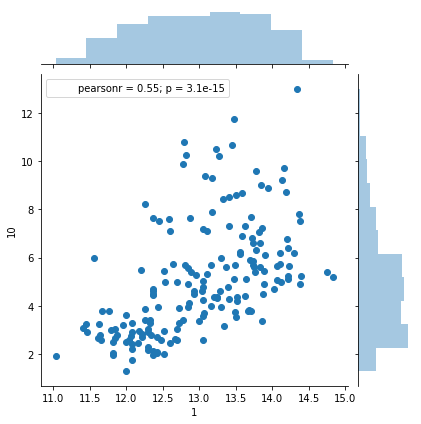

In [47]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

x = df[1]
y = df[10]
z = 5

p = figure(x_axis_label='Alcohol', y_axis_label='Colour Intensity')
p.circle(
    x, y, size=z)
show(p)

sns.jointplot(x=df[1],y=df[10],data=df)


# Prediction

In [34]:
X=wine.data
y=(wine.target==0).astype(np.float32) 
print(np.mean(y))
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

0.33146068


In [24]:
#Use sklearn to build a classification model with X_Train, y_train as training data
model = sklearn.ensemble.RandomForestClassifier(n_estimators=1)
result = model.fit(X_train,y_train)
print(result)
#Generate predictions on X_test and call it yhat
yhat_test = result.predict(X_test)
yhat_train = result.predict(X_train)
#Measure the average precision and recall on the trianing set and the test set
#sklearn.metrics.classification_report
print(sklearn.metrics.classification_report(y_test,yhat_test))
print(sklearn.metrics.classification_report(y_train,yhat_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96        36
        1.0       0.94      0.89      0.91        18

avg / total       0.94      0.94      0.94        54

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97        83
        1.0       1.00      0.88      0.94        41

avg / total       0.96      0.96      0.96       124

